In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import linalg

(0, 50)

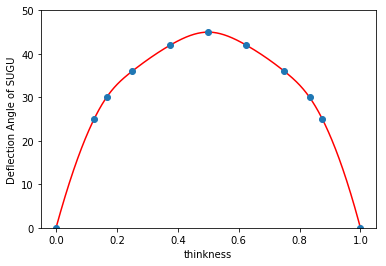

In [231]:
# 수구 분리각 데이터
x1 = [0, 0.125, 0.166, 0.25, 0.375, 0.5, 0.625, 0.750, 0.833, 0.875, 1]
y1 = [0, 25, 30, 36, 42, 45, 42, 36, 30, 25, 0]

result1 = interpolate.CubicSpline(x1, y1, bc_type = 'not-a-knot')
xs = np.linspace(0,1,1000)
plt.plot(xs, result1(xs),'r')
plt.plot(x1, y1,'o')
plt.xlabel("thinkness")
plt.ylabel("Deflection Angle of SUGU")
plt.ylim(0,50)

(0, 95)

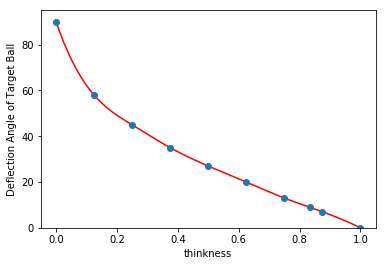

In [232]:
# 적구 분리각 데이터
x2 = [0, 0.125,  0.25, 0.375, 0.5, 0.625, 0.750, 0.833, 0.875, 1]
y2 = [90, 58,  45, 35, 27, 20, 13, 9, 7, 0]
result2 = interpolate.CubicSpline(x2, y2, bc_type = 'not-a-knot')
xs = np.linspace(0,1,1000)
plt.plot(xs, result2(xs),'r')
plt.plot(x2, y2 ,'o')
plt.xlabel("thinkness")
plt.ylabel("Deflection Angle of Target Ball")
plt.ylim(0, 95)

In [26]:
# 단위 m, kg
a = 1.224 # 4구 다이 가로
b = 2.448 # 4구 다이 세로
radi = 0.0655 # 4구 다마 반지름
m = 0.24 # 4구 다마 질량

In [19]:
# 맛세이 고려 안함

In [20]:
# b1 - > 수구
# b2 - > 상대방 공
# b3 - > 목적구
# b4 - > 목적구

In [234]:
class sagu:
    def __init__(self, position, velocity,spin): # 위치, 속도, 회전
        self.position = position
        self.velocity = velocity
        self.spin     = spin
    def state(self, position, velocity,spin): # 위치, 속도, 회전
        self.position = position
        self.velocity = velocity
        self.spin     = spin        

In [308]:
def chungdol(position1, position2, velocity1, velocity2):
    # 1 붙은게 수구, 2 붙은게 목적구(충돌 대상)
    r = position2 - position1
    vel1 = np.array(velocity1)
    vel2 = np.array(velocity2)
    v_rel = velocity1 - velocity2
    theta = np.arccos(np.dot(r, v_rel) / np.linalg.norm(r) / np.linalg.norm(v_rel))
    thickness = 1 - np.sin(theta) # 두께를 분수로 표현
    if (thickness <= 0.01):
        return vel1, vel2
    theta_1 = result1(thickness)
    theta_2 = result2(thickness)
    print(thickness, theta_1, theta_2)
    theta_1 = result1(thickness) * np.pi / 180
    theta_2 = result2(thickness) * np.pi / 180

    # 수구와 적구, 왼쪽 오른쪽 관계 외적으로 파악하기
    if(np.linalg.norm(np.cross(r, v_rel)) < 0): # 수구 왼쪽 적구 오른쪽
        velocity1_after = 0.4 * np.array([[np.cos(theta_1), (-1) * np.sin(theta_1)], [np.sin(theta_1), np.cos(theta_1)]]).dot(vel1)
        velocity2_after = 0.9 * np.array([[np.cos(theta_2), np.sin(theta_2)], [(-1) * np.sin(theta_2), np.cos(theta_2)]]).dot(vel1)
        return velocity1_after, velocity2_after
    if(np.linalg.norm(np.cross(r, v_rel)) >= 0): # 수구 오른쪽 적구 왼쪽
        velocity1_after = 0.4 * np.array([[np.cos(theta_1), np.sin(theta_1)], [(-1) * np.sin(theta_1), np.cos(theta_1)]]).dot(vel1)
        velocity2_after = 0.9 * np.array([[np.cos(theta_2), (-1) * np.sin(theta_2)], [np.sin(theta_2), np.cos(theta_2)]]).dot(vel1)
        return velocity1_after, velocity2_after



In [324]:
success = 0
dt = 1
check3 = 0
check4 = 0
BBAK   = 0
TOL = 10**(-2)
D = 0.47
rho = 1
pos1 = [2.045,0.4]
pos2 = [0.1,0.1]
pos3 = [2.0,1.0]
pos4 = [0.1,1.2]
x1 = []
x2 = []
x3 = []
x4 = []
y1 = []
y2 = []
y3 = []
y4 = []
# 초기 스트로크 주고
b1 = sagu(pos1,[0,0.15],0)
b2 = sagu(pos2,[0,0],0)
b3 = sagu(pos3,[0,0],0)
b4 = sagu(pos4,[0,0],0)
r1 = b1.position
r2 = b2.position
r3 = b3.position
r4 = b4.position
r  = np.array([r1, r2, r3, r4])
v1 = b1.velocity
v2 = b2.velocity
v3 = b3.velocity
v4 = b4.velocity
v  = np.array([v1, v2, v3, v4])
s1 = b1.spin
s2 = b2.spin
s3 = b3.spin
s4 = b4.spin
s  = np.array([s1, s2, s3, s4])
# while 문 돌입
while(1):
    x1.append(r[0][0])
    y1.append(r[0][1])
    x2.append(r[1][0])
    y2.append(r[1][1])
    x3.append(r[2][0])
    y3.append(r[2][1])
    x4.append(r[3][0])
    y4.append(r[3][1])
    print(r)
    print(v)
    for i in range(0,4): # 공 움직이기
        r[i][0] += v[i][0] * dt
        r[i][1] += v[i][1] * dt
    if((check3 >= 1) and (check4 >=1)): # 득점에 성공한 경우
        print("success!")
        success += 1
        break
    if((np.linalg.norm(v[0]) + np.linalg.norm(v[1]) + np.linalg.norm(v[2]) + np.linalg.norm(v[3])) < TOL): # 모든 공이 정지한 경우
        print("end")
        break
    if(BBAK >= 1):
        print("BBAK")
        break
    for i in range(0, 4): # 공끼리 충돌 여부 확인하기!
        for j in range(i+1, 4):
            if((np.linalg.norm(r[i] - r[j]) < (radi * 2))): # i 번째 공과 j 번째 공의 충돌 여부
                print("CHUNGDOL!!")
                v[i], v[j] = chungdol(r[i], r[j], v[i], v[j])
                if((i == 0) and (j == 1)): # 파울 여부 확인
                    BBAK += 1
                # 충돌시키기
                if((i == 0) and (j == 2)): # 득점 관련 여부확인 위해
                    check3 += 1
                if((i == 0) and (j == 3)): # 득점 관련 여부확인
                    check4 += 1
    for i in range(0,4): # 쿠션에 충돌 여부 확인하기!
        if(r[i][1] < 0.0655): # 아래쪽 장쿠션과 맞는 경우
            v[i][1] = (-1) * v[i][1]
            v[i][0] = (1 + s[i]) * v[i][0]
        if(r[i][1] > 1.1585): # 위쪽 장쿠션과 맞는 경우
            v[i][1] = (-1) * v[i][1]
            v[i][0] = (1 - s[i]) * v[i][0]
        if(r[i][0] < 0.0655): # 왼쪽 단쿠션과 맞는 경우
            v[i][0] = (-1) * v[i][0]
            v[i][1] = (1 - s[i]) * v[i][1]
        if(r[i][0] > 2.3825): # 오른쪽 단쿠션과 맞는 경우
            v[i][0] = (-1) * v[i][0]
            v[i][1] = (1 + s[i]) * v[i][1]
    for i in range(0,4): # 마찰
        v[i][0] = v[i][0] - 0.5 * D * rho * np.pi * (radi**2) * np.linalg.norm(v[i]) * v[i][0] * dt / 0.24
        v[i][1] = v[i][1] - 0.5 * D * rho * np.pi * (radi**2) * np.linalg.norm(v[i]) * v[i][1] * dt / 0.24

plt.plot(x1, y1, 'ko')
plt.plot(x2, y2, 'yo')
plt.plot(x3, y3, 'ro')
plt.plot(x4, y4, 'bo')
plt.xlim(0,2.448)
plt.ylim(0,1.224)
plt.show()

[[2.045 0.4  ]
 [0.1   0.1  ]
 [2.    1.   ]
 [0.1   1.2  ]]
[[0.   0.15]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]]
[[2.045 0.55 ]
 [0.1   0.1  ]
 [2.    1.   ]
 [0.1   1.2  ]]
[[0.         0.14970306]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
[[2.045      0.69970306]
 [0.1        0.1       ]
 [2.         1.        ]
 [0.1        1.2       ]]
[[0.         0.14940729]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
[[2.045      0.84911035]
 [0.1        0.1       ]
 [2.         1.        ]
 [0.1        1.2       ]]
[[0.         0.14911269]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
CHUNGDOL!!
[[2.045      0.99822304]
 [0.1        0.1       ]
 [2.         1.        ]
 [0.1        1.2       ]]
[[0.         0.14881925]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
[[2.045      1.14704229]
 [0.1        0.1       ]
 [2.         1.        ]
 [0.1        1.2       ]]
[[0.  

 [0.1        1.2       ]]
[[-0.01072545 -0.05444372]
 [ 0.          0.        ]
 [-0.11493811  0.03225024]
 [ 0.          0.        ]]
[[2.18086099 0.97497938]
 [0.1        0.1       ]
 [0.79362437 0.45089296]
 [0.1        1.2       ]]
[[-0.0107176  -0.05440385]
 [ 0.          0.        ]
 [-0.11475703  0.0321995 ]
 [ 0.          0.        ]]
[[2.17014339 0.92057553]
 [0.1        0.1       ]
 [0.67886735 0.48309246]
 [0.1        1.2       ]]
[[-0.01070975 -0.05436404]
 [ 0.          0.        ]
 [-0.11457652  0.03214893]
 [ 0.          0.        ]]
[[2.15943364 0.86621149]
 [0.1        0.1       ]
 [0.56429083 0.51524139]
 [0.1        1.2       ]]
[[-0.01070192 -0.05432428]
 [ 0.          0.        ]
 [-0.11439657  0.03209851]
 [ 0.          0.        ]]
[[2.14873172 0.81188721]
 [0.1        0.1       ]
 [0.44989426 0.5473399 ]
 [0.1        1.2       ]]
[[-0.0106941  -0.05428459]
 [ 0.          0.        ]
 [-0.11421719  0.03204825]
 [ 0.          0.        ]]
[[2.13803761 0.75760262]


[[-0.01023777  0.05196826]
 [ 0.          0.        ]
 [ 0.10424659  0.02925431]
 [ 0.          0.        ]]
[[1.50004589 0.28018838]
 [0.1        0.1       ]
 [1.33504119 0.20617614]
 [0.1        1.2       ]]
[[-0.01023062  0.05193193]
 [ 0.          0.        ]
 [ 0.10409763  0.02921256]
 [ 0.          0.        ]]
CHUNGDOL!!
0.04073550332578513 9.675356316912621 76.25851534634077
[[1.48981528 0.33212031]
 [0.1        0.1       ]
 [1.43913883 0.2353887 ]
 [0.1        1.2       ]]
[[-0.0005427   0.02115915]
 [ 0.          0.        ]
 [-0.04755821  0.00215703]
 [ 0.          0.        ]]
[[1.48927258 0.35327946]
 [0.1        0.1       ]
 [1.39158061 0.23754572]
 [0.1        1.2       ]]
[[-0.00054255  0.02115324]
 [ 0.          0.        ]
 [-0.04752833  0.00215567]
 [ 0.          0.        ]]
[[1.48873003 0.3744327 ]
 [0.1        0.1       ]
 [1.34405228 0.23970139]
 [0.1        1.2       ]]
[[-0.0005424   0.02114733]
 [ 0.          0.        ]
 [-0.04749849  0.00215432]
 [ 0.       

 [0.1        1.2       ]]
[[-0.00053685  0.02093106]
 [ 0.          0.        ]
 [ 0.04642006  0.00210544]
 [ 0.          0.        ]]
[[1.46822463 1.17390842]
 [0.1        0.1       ]
 [0.49072734 0.3206298 ]
 [0.1        1.2       ]]
[[-0.0005367  -0.02092528]
 [ 0.          0.        ]
 [ 0.04639159  0.00210415]
 [ 0.          0.        ]]
[[1.46768793 1.15298315]
 [0.1        0.1       ]
 [0.53711893 0.32273395]
 [0.1        1.2       ]]
[[-0.00053655 -0.02091949]
 [ 0.          0.        ]
 [ 0.04636316  0.00210286]
 [ 0.          0.        ]]
[[1.46715137 1.13206365]
 [0.1        0.1       ]
 [0.58348209 0.32483681]
 [0.1        1.2       ]]
[[-0.00053641 -0.02091372]
 [ 0.          0.        ]
 [ 0.04633476  0.00210157]
 [ 0.          0.        ]]
[[1.46661497 1.11114994]
 [0.1        0.1       ]
 [0.62981685 0.32693837]
 [0.1        1.2       ]]
[[-0.00053626 -0.02090794]
 [ 0.          0.        ]
 [ 0.0463064   0.00210028]
 [ 0.          0.        ]]
[[1.46607871 1.09024199]


 [0.1        1.2       ]]
[[-0.00052723  0.02055606]
 [ 0.          0.        ]
 [-0.04461326  0.00202353]
 [ 0.          0.        ]]
[[1.43311656 0.29917905]
 [0.1        0.1       ]
 [1.33703926 0.45680911]
 [0.1        1.2       ]]
[[-0.00052709  0.02055049]
 [ 0.          0.        ]
 [-0.04458696  0.00202234]
 [ 0.          0.        ]]
[[1.43258947 0.31972953]
 [0.1        0.1       ]
 [1.29245229 0.45883146]
 [0.1        1.2       ]]
[[-0.00052695  0.02054491]
 [ 0.          0.        ]
 [-0.0445607   0.00202115]
 [ 0.          0.        ]]
[[1.43206252 0.34027444]
 [0.1        0.1       ]
 [1.24789159 0.46085261]
 [0.1        1.2       ]]
[[-0.0005268   0.02053934]
 [ 0.          0.        ]
 [-0.04453447  0.00201996]
 [ 0.          0.        ]]
[[1.43153572 0.36081378]
 [0.1        0.1       ]
 [1.20335712 0.46287257]
 [0.1        1.2       ]]
[[-0.00052666  0.02053377]
 [ 0.          0.        ]
 [-0.04450827  0.00201877]
 [ 0.          0.        ]]
[[1.43100906 0.38134755]


 [0.1        1.2       ]]
[[-0.0005192  -0.02024285]
 [ 0.          0.        ]
 [ 0.04316238  0.00195776]
 [ 0.          0.        ]]
[[1.4032984  0.8939588 ]
 [0.1        0.1       ]
 [1.27252229 0.57022258]
 [0.1        1.2       ]]
[[-0.00051906 -0.02023744]
 [ 0.          0.        ]
 [ 0.04313777  0.00195665]
 [ 0.          0.        ]]
[[1.40277934 0.87372136]
 [0.1        0.1       ]
 [1.31566006 0.57217923]
 [0.1        1.2       ]]
[[-0.00051892 -0.02023204]
 [ 0.          0.        ]
 [ 0.04311318  0.00195553]
 [ 0.          0.        ]]
[[1.40226042 0.85348932]
 [0.1        0.1       ]
 [1.35877324 0.57413476]
 [0.1        1.2       ]]
[[-0.00051878 -0.02022663]
 [ 0.          0.        ]
 [ 0.04308863  0.00195442]
 [ 0.          0.        ]]
[[1.40174164 0.83326269]
 [0.1        0.1       ]
 [1.40186187 0.57608918]
 [0.1        1.2       ]]
[[-0.00051865 -0.02022123]
 [ 0.          0.        ]
 [ 0.0430641   0.00195331]
 [ 0.          0.        ]]
[[1.40122299 0.81304145]


[[1.3826434  0.08865003]
 [0.1        0.1       ]
 [1.79324319 0.64763158]
 [0.1        1.2       ]]
[[-0.00051357 -0.0200234 ]
 [ 0.          0.        ]
 [-0.0421758   0.00191304]
 [ 0.          0.        ]]
[[1.38212983 0.06862663]
 [0.1        0.1       ]
 [1.7510674  0.64954462]
 [0.1        1.2       ]]
[[-0.00051344 -0.02001811]
 [ 0.          0.        ]
 [-0.0421523   0.00191197]
 [ 0.          0.        ]]
[[1.38161639 0.04860852]
 [0.1        0.1       ]
 [1.7089151  0.6514566 ]
 [0.1        1.2       ]]
[[-0.0005133   0.02001282]
 [ 0.          0.        ]
 [-0.04212882  0.00191091]
 [ 0.          0.        ]]
[[1.38110309 0.06862134]
 [0.1        0.1       ]
 [1.66678627 0.65336751]
 [0.1        1.2       ]]
[[-0.00051316  0.02000753]
 [ 0.          0.        ]
 [-0.04210538  0.00190985]
 [ 0.          0.        ]]
[[1.38058993 0.08862887]
 [0.1        0.1       ]
 [1.6246809  0.65527735]
 [0.1        1.2       ]]
[[-0.00051303  0.02000225]
 [ 0.          0.        ]
 [-0.

[[1.34600905 0.88563306]
 [0.1        0.1       ]
 [1.26846112 0.78271621]
 [0.1        1.2       ]]
[[-0.00559407 -0.00552644]
 [ 0.          0.        ]
 [ 0.0064909  -0.01645685]
 [ 0.          0.        ]]
[[1.34041498 0.88010661]
 [0.1        0.1       ]
 [1.27495202 0.76625937]
 [0.1        1.2       ]]
[[-0.00559349 -0.00552587]
 [ 0.          0.        ]
 [ 0.00648938 -0.01645301]
 [ 0.          0.        ]]
[[1.33482148 0.87458074]
 [0.1        0.1       ]
 [1.28144141 0.74980636]
 [0.1        1.2       ]]
[[-0.00559291 -0.0055253 ]
 [ 0.          0.        ]
 [ 0.00648787 -0.01644917]
 [ 0.          0.        ]]
[[1.32922857 0.86905545]
 [0.1        0.1       ]
 [1.28792928 0.7333572 ]
 [0.1        1.2       ]]
[[-0.00559233 -0.00552472]
 [ 0.          0.        ]
 [ 0.00648636 -0.01644533]
 [ 0.          0.        ]]
[[1.32363624 0.86353073]
 [0.1        0.1       ]
 [1.29441563 0.71691187]
 [0.1        1.2       ]]
[[-0.00559175 -0.00552415]
 [ 0.          0.        ]
 [ 0.

[[-0.00555888 -0.00549168]
 [ 0.          0.        ]
 [ 0.00639974  0.01622572]
 [ 0.          0.        ]]
[[1.00026977 0.54407358]
 [0.1        0.1       ]
 [1.66805773 0.35486198]
 [0.1        1.2       ]]
[[-0.00555831 -0.00549111]
 [ 0.          0.        ]
 [ 0.00639826  0.01622198]
 [ 0.          0.        ]]
[[0.99471147 0.53858247]
 [0.1        0.1       ]
 [1.674456   0.37108397]
 [0.1        1.2       ]]
[[-0.00555773 -0.00549054]
 [ 0.          0.        ]
 [ 0.00639679  0.01621825]
 [ 0.          0.        ]]
[[0.98915373 0.53309193]
 [0.1        0.1       ]
 [1.68085279 0.38730222]
 [0.1        1.2       ]]
[[-0.00555716 -0.00548998]
 [ 0.          0.        ]
 [ 0.00639532  0.01621452]
 [ 0.          0.        ]]
[[0.98359657 0.52760195]
 [0.1        0.1       ]
 [1.68724811 0.40351674]
 [0.1        1.2       ]]
[[-0.00555659 -0.00548941]
 [ 0.          0.        ]
 [ 0.00639385  0.01621079]
 [ 0.          0.        ]]
[[0.97803999 0.52211254]
 [0.1        0.1       ]
 

[[0.51882883 0.06845281]
 [0.1        0.1       ]
 [2.2192688  0.57045464]
 [0.1        1.2       ]]
[[-0.00550888 -0.00544228]
 [ 0.          0.        ]
 [ 0.00627264 -0.0159035 ]
 [ 0.          0.        ]]
[[0.51331995 0.06301052]
 [0.1        0.1       ]
 [2.22554144 0.55455114]
 [0.1        1.2       ]]
[[-0.00550832  0.00544173]
 [ 0.          0.        ]
 [ 0.00627123 -0.01589991]
 [ 0.          0.        ]]
[[0.50781163 0.06845225]
 [0.1        0.1       ]
 [2.23181267 0.53865123]
 [0.1        1.2       ]]
[[-0.00550775  0.00544117]
 [ 0.          0.        ]
 [ 0.00626981 -0.01589633]
 [ 0.          0.        ]]
[[0.50230387 0.07389342]
 [0.1        0.1       ]
 [2.23808248 0.5227549 ]
 [0.1        1.2       ]]
[[-0.00550719  0.00544062]
 [ 0.          0.        ]
 [ 0.0062684  -0.01589274]
 [ 0.          0.        ]]
[[0.49679668 0.07933404]
 [0.1        0.1       ]
 [2.24435088 0.50686216]
 [0.1        1.2       ]]
[[-0.00550663  0.00544006]
 [ 0.          0.        ]
 [ 0.

 [0.1        1.2       ]]
[[-0.00548199  0.00541572]
 [ 0.          0.        ]
 [-0.00620542  0.01573308]
 [ 0.          0.        ]]
[[0.24955364 0.32358824]
 [0.1        0.1       ]
 [2.25129488 0.33125555]
 [0.1        1.2       ]]
[[-0.00548143  0.00541517]
 [ 0.          0.        ]
 [-0.00620404  0.01572957]
 [ 0.          0.        ]]
[[0.24407221 0.3290034 ]
 [0.1        0.1       ]
 [2.24509084 0.34698512]
 [0.1        1.2       ]]
[[-0.00548087  0.00541462]
 [ 0.          0.        ]
 [-0.00620265  0.01572606]
 [ 0.          0.        ]]
[[0.23859134 0.33441802]
 [0.1        0.1       ]
 [2.23888819 0.36271118]
 [0.1        1.2       ]]
[[-0.00548031  0.00541406]
 [ 0.          0.        ]
 [-0.00620127  0.01572255]
 [ 0.          0.        ]]
[[0.23311102 0.33983208]
 [0.1        0.1       ]
 [2.23268692 0.37843373]
 [0.1        1.2       ]]
[[-0.00547976  0.00541351]
 [ 0.          0.        ]
 [-0.00619989  0.01571904]
 [ 0.          0.        ]]
[[0.22763126 0.3452456 ]


[[0.17264284 0.61522201]
 [0.1        0.1       ]
 [1.91824274 1.14457664]
 [0.1        1.2       ]]
[[ 0.00545149  0.00538559]
 [ 0.          0.        ]
 [-0.00613015 -0.01554224]
 [ 0.          0.        ]]
[[0.17809433 0.6206076 ]
 [0.1        0.1       ]
 [1.91211259 1.1290344 ]
 [0.1        1.2       ]]
[[ 0.00545094  0.00538505]
 [ 0.          0.        ]
 [-0.0061288  -0.01553882]
 [ 0.          0.        ]]
[[0.18354527 0.62599265]
 [0.1        0.1       ]
 [1.90598379 1.11349558]
 [0.1        1.2       ]]
[[ 0.00545039  0.0053845 ]
 [ 0.          0.        ]
 [-0.00612745 -0.01553539]
 [ 0.          0.        ]]
[[0.18899566 0.63137715]
 [0.1        0.1       ]
 [1.89985634 1.09796019]
 [0.1        1.2       ]]
[[ 0.00544984  0.00538396]
 [ 0.          0.        ]
 [-0.0061261  -0.01553197]
 [ 0.          0.        ]]
[[0.1944455  0.63676111]
 [0.1        0.1       ]
 [1.89373024 1.08242822]
 [0.1        1.2       ]]
[[ 0.00544929  0.00538341]
 [ 0.          0.        ]
 [-0.

 [ 0.          0.        ]]
[[0.52584781 0.96415739]
 [0.1        0.1       ]
 [1.52256855 0.14139336]
 [0.1        1.2       ]]
[[ 0.00541588  0.00535042]
 [ 0.          0.        ]
 [-0.00604352 -0.0153226 ]
 [ 0.          0.        ]]
[[0.5312637  0.96950781]
 [0.1        0.1       ]
 [1.51652503 0.12607076]
 [0.1        1.2       ]]
[[ 0.00541534  0.00534988]
 [ 0.          0.        ]
 [-0.0060422  -0.01531927]
 [ 0.          0.        ]]
[[0.53667904 0.97485769]
 [0.1        0.1       ]
 [1.51048283 0.1107515 ]
 [0.1        1.2       ]]
[[ 0.0054148   0.00534934]
 [ 0.          0.        ]
 [-0.00604089 -0.01531594]
 [ 0.          0.        ]]
[[0.54209383 0.98020703]
 [0.1        0.1       ]
 [1.50444194 0.09543556]
 [0.1        1.2       ]]
[[ 0.00541425  0.00534881]
 [ 0.          0.        ]
 [-0.00603958 -0.01531261]
 [ 0.          0.        ]]
[[0.54750809 0.98555584]
 [0.1        0.1       ]
 [1.49840237 0.08012295]
 [0.1        1.2       ]]
[[ 0.00541371  0.00534827]
 [ 0

[[0.7366651  1.15110501]
 [0.1        0.1       ]
 [1.2878397  0.58336032]
 [0.1        1.2       ]]
[[ 0.00539474 -0.00532953]
 [ 0.          0.        ]
 [-0.0059927   0.01519376]
 [ 0.          0.        ]]
[[0.74205984 1.14577547]
 [0.1        0.1       ]
 [1.281847   0.59855408]
 [0.1        1.2       ]]
[[ 0.0053942  -0.005329  ]
 [ 0.          0.        ]
 [-0.00599141  0.01519049]
 [ 0.          0.        ]]
[[0.74745404 1.14044647]
 [0.1        0.1       ]
 [1.2758556  0.61374457]
 [0.1        1.2       ]]
[[ 0.00539366 -0.00532847]
 [ 0.          0.        ]
 [-0.00599012  0.01518721]
 [ 0.          0.        ]]
[[0.75284771 1.13511801]
 [0.1        0.1       ]
 [1.26986548 0.62893178]
 [0.1        1.2       ]]
[[ 0.00539312 -0.00532793]
 [ 0.          0.        ]
 [-0.00598883  0.01518394]
 [ 0.          0.        ]]
[[0.75824083 1.12979007]
 [0.1        0.1       ]
 [1.26387665 0.64411573]
 [0.1        1.2       ]]
[[ 0.00539258 -0.0053274 ]
 [ 0.          0.        ]
 [-0.

 [0.1        1.2       ]]
[[ 0.00536841 -0.00530352]
 [ 0.          0.        ]
 [-0.00593005 -0.01503493]
 [ 0.          0.        ]]
CHUNGDOL!!
0.1644039697696822 29.836990685479687 52.79788418433495
[[1.00574299 0.88527963]
 [0.1        0.1       ]
 [0.98977623 1.0079422 ]
 [0.1        1.2       ]]
[[ 0.00080721 -0.00290848]
 [ 0.          0.        ]
 [ 0.00672257  0.0009623 ]
 [ 0.          0.        ]]
end


KeyboardInterrupt: 